<a href="https://colab.research.google.com/github/EmmaAsare/EmmaAsare.github.io/blob/master/Data_Mining_and_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras import models, layers
# import the mnist dataset
from tensorflow.keras.optimizers import SGD
# import SGD optimizer
from sklearn.utils import shuffle
# data shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# for checking at the end
import numpy as np
# import numpy for arrays
import matplotlib.pyplot as plt
# import matplotlib for plotting
import os
# import os for path stitching n stuff
import cv2
# import cv2 for image reading
import tensorflow as tf
from tensorflow import keras


Load and preprocess the MNIST dataset.

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

Visualize some of the MNIST data that will be used in this activity

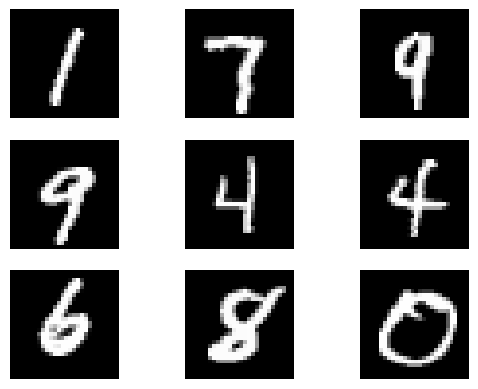

In [ ]:
for i in range(9):
  index = np.random.randint(0, 60000)
# randomly pick an integer from 0 to 60,000
  plt.subplot(3,3,i+1)
# generate subplots
  plt.imshow(x_train[index], cmap='gray')
# plot images using grayscale color map
  plt.axis('off')


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Helper Functions**

Functions which will be used for observing, testing and evaluating the models. Function for plotting the training and validation history.

In [ ]:
# Plot training and validation accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')

    plt.tight_layout(w_pad=5, h_pad=5)
    plt.show()

Function for evaluating a given model on a given test dataset (by default the test dataset is the MNIST test dataset unless a different one is provided in the arguments).

In [ ]:
# Accuracy on test dataset
def evaluate_model_accuracy(model, x_test, y_test):
  results = model.evaluate(x_test,y_test, batch_size = 32)
  print(f"Test Loss, Test Accuracy: {results}")
  #print("Accuracy of the test dataset is:", accuracy_score(label_data, y_pred))

In [ ]:
# Define function for fully connected models

def fully_connected_model(num_layers,activation):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  for i in range(num_layers):

      model.add(Dense(int(128/(i+1)), activation=activation))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# define function to make cnn models:
def make_model(name, cnn_layers_number,first_filter,subsequent_filter):
  name = str(name)
# instantiate model:
  my_model = models.Sequential(name = name)
# our convolutional layer has 32 filters and a kernel size of 3x3
# the input shape must be 28x28x1, as we have 28x28 pixel images one channel
# max pooling is used to reduce dimensionality
# this process is repeated for cnn_layers_number times
  for i in range(cnn_layers_number):
    if i == 0:
      my_model.add(layers.Conv2D(first_filter,(3,3), activation = 'relu', input_shape = (28,28,1), name = f'Conv{i+1}'))
      my_model.add(layers.MaxPooling2D((2,2), name = f'MaxPool{i+1}'))
    else:
      my_model.add(layers.Conv2D(subsequent_filter,(3,3), activation = 'relu', name = f'Conv{i+1}'))
      my_model.add(layers.MaxPooling2D((2,2), name = f'MaxPool{i+1}'))
# need to add the fully connected layers so that the feature vector we extract can be used to classify images into
  my_model.add(layers.Flatten(name = 'Flattening'))
# convert to vector for FCN
  my_model.add(layers.Dense(100, activation = 'relu', name = 'Dense'))
# fully connected dense layer for classificat
  my_model.add(layers.Dense(10, activation = 'softmax', name = 'Softmax'))
# using softmax to convert from logits to pro
  return my_model

**Create a fully connected model**
A fully connected model with 8 hidden layers is first created and tested

In [ ]:
my_fully_connected_model = fully_connected_model(8,'relu')

Create a function for testing and visualizing the models

In [ ]:
def test_experiment(my_model,x_train,x_test,y_train,y_test,batch_size,epochs):
  my_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
  history = my_model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)
  plot_training_history(history)
def model_structure(model):
  keras.utils.plot_model(model, show_shapes=True)
  model.summary()


Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7141 - loss: 0.8636 - val_accuracy: 0.9437 - val_loss: 0.2091
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9492 - loss: 0.1903 - val_accuracy: 0.9601 - val_loss: 0.1456
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9675 - loss: 0.1126 - val_accuracy: 0.9585 - val_loss: 0.1431
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9741 - loss: 0.0882 - val_accuracy: 0.9617 - val_loss: 0.1390
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9809 - loss: 0.0679 - val_accuracy: 0.9669 - val_loss: 0.1208
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9828 - loss: 0.0576 - val_accuracy: 0.9687 - val_loss: 0.1168
Epoch 7/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9850 - loss: 0.0502 - val_accuracy: 0.9699 - val_loss: 0.1282
Epoch 8/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9886 - loss: 0.0

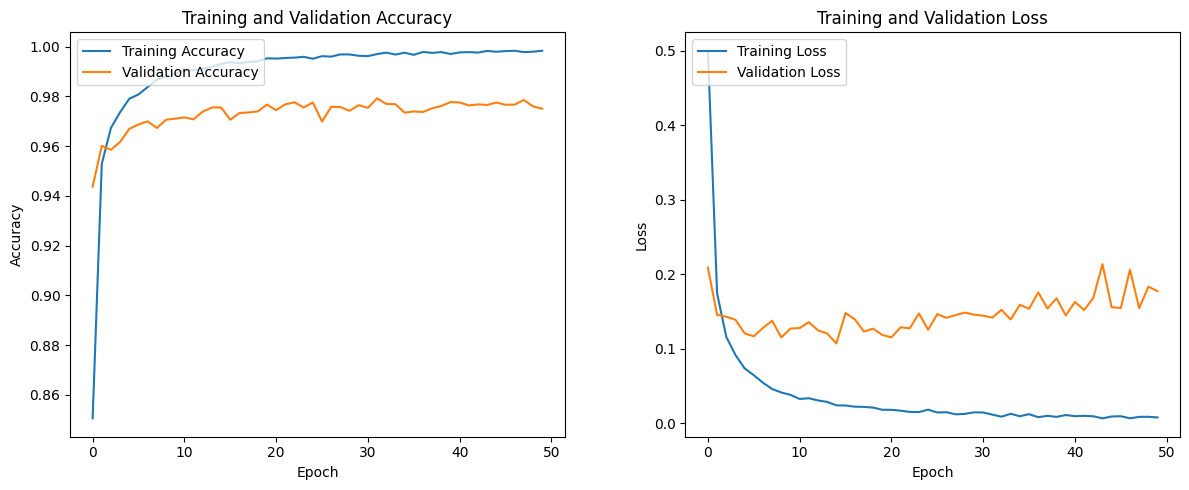

In [ ]:
test_experiment(my_fully_connected_model,x_train,x_test,y_train,y_test,30,50)

In [ ]:
evaluate_model_accuracy(my_fully_connected_model, x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9758 - loss: 0.1626
Test Loss, Test Accuracy: [0.15043966472148895, 0.9787999987602234]


**Observation**
The model appears overfitted, the training accuracy is very close to 100 but the validation and and test accuracy are slightly less, around 98%

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 42)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 10)                  │             430 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,896 (437.09 KB)

 Trainable params: 111,896 (437.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8485 - loss: 0.5028 - val_accuracy: 0.9562 - val_loss: 0.1471
Epoch 2/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9642 - loss: 0.1218 - val_accuracy: 0.9630 - val_loss: 0.1215
Epoch 3/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9768 - loss: 0.0748 - val_accuracy: 0.9711 - val_loss: 0.1026
Epoch 4/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9810 - loss: 0.0612 - val_accuracy: 0.9722 - val_loss: 0.0973
Epoch 5/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9693 - val_loss: 0.1080
Epoch 6/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9866 - loss: 0.0397 - val_accuracy: 0.9743 - val_loss: 0.0986
Epoch 7/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9742 - val_loss: 0.1031
Epoch 8/50
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.029

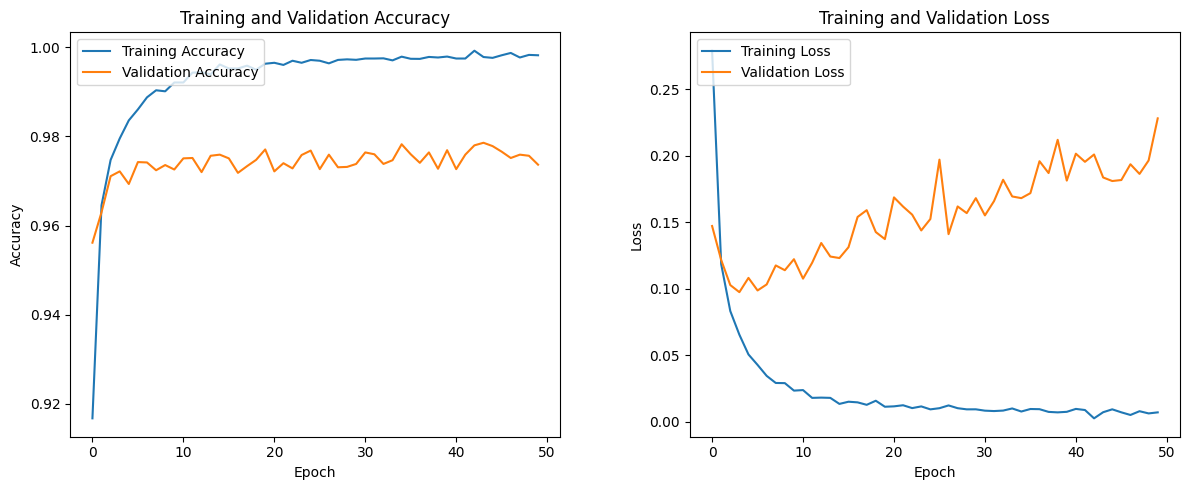

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.2632
Test Loss, Test Accuracy: [0.22123485803604126, 0.9740999937057495]


In [ ]:
#Check second fully connected with 3 hidden layers
second_fully_connected_model = fully_connected_model(3,'relu')
model_structure(second_fully_connected_model)
test_experiment(second_fully_connected_model,x_train,x_test,y_train,y_test,30,50)
evaluate_model_accuracy(second_fully_connected_model, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 42)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 10)                  │             430 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,896 (437.09 KB)

 Trainable params: 111,896 (437.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8227 - loss: 0.6483 - val_accuracy: 0.9444 - val_loss: 0.1946
Epoch 2/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9458 - loss: 0.1825 - val_accuracy: 0.9561 - val_loss: 0.1458
Epoch 3/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9656 - loss: 0.1172 - val_accuracy: 0.9655 - val_loss: 0.1228
Epoch 4/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9752 - loss: 0.0841 - val_accuracy: 0.9702 - val_loss: 0.1023
Epoch 5/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9808 - loss: 0.0642 - val_accuracy: 0.9701 - val_loss: 0.1027
Epoch 6/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9854 - loss: 0.0495 - val_accuracy: 0.9706 - val_loss: 0.1003
Epoch 7/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9876 - loss: 0.0392 - val_accuracy: 0.9672 - val_loss: 0.1107
Epoch 8/35
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9918 - loss: 0.0285 - val_accuracy: 0.

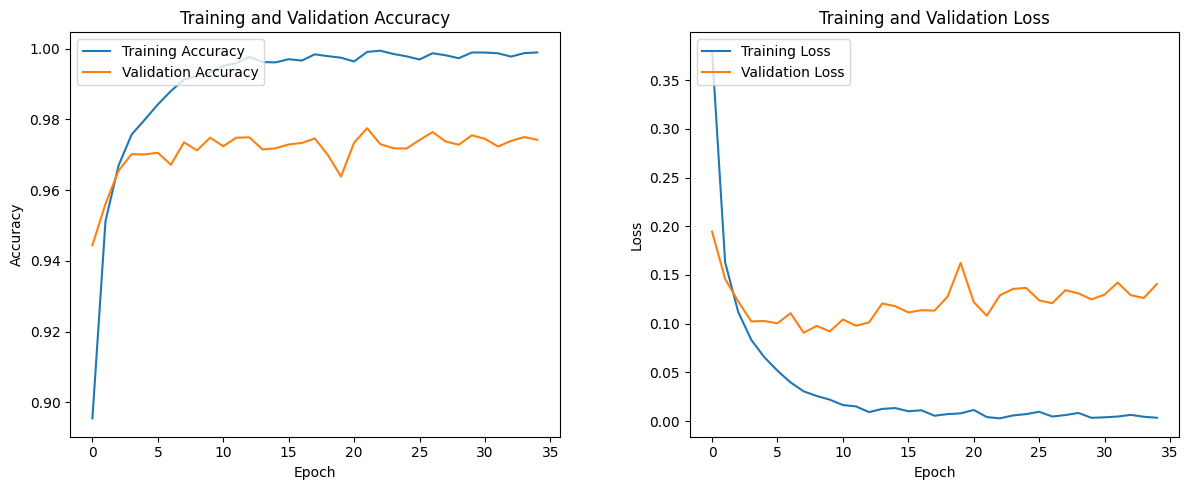

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1374
Test Loss, Test Accuracy: [0.12134762853384018, 0.9750000238418579]


In [ ]:
#Check second fully connected with 3 hidden layers
third_fully_connected_model = fully_connected_model(3,'tanh')
model_structure(third_fully_connected_model)
test_experiment(third_fully_connected_model,x_train,x_test,y_train,y_test,100,35)
evaluate_model_accuracy(third_fully_connected_model, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8278 - loss: 0.6246 - val_accuracy: 0.9461 - val_loss: 0.1936
Epoch 2/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9468 - loss: 0.1846 - val_accuracy: 0.9569 - val_loss: 0.1468
Epoch 3/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9650 - loss: 0.1255 - val_accuracy: 0.9656 - val_loss: 0.1181
Epoch 4/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9741 - loss: 0.0939 - val_accuracy: 0.9668 - val_loss: 0.1103
Epoch 5/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0749 - val_accuracy: 0.9698 - val_loss: 0.0994
Epoch 6/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9825 - loss: 0.0609 - val_accuracy: 0.9723 - val_loss: 0.0898
Epoch 7/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9874 - loss: 0.0469 - val_accuracy: 0.9729 - val_loss: 0.0888
Epoch 8/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9887 - loss: 0.0395 - val_accuracy: 0.

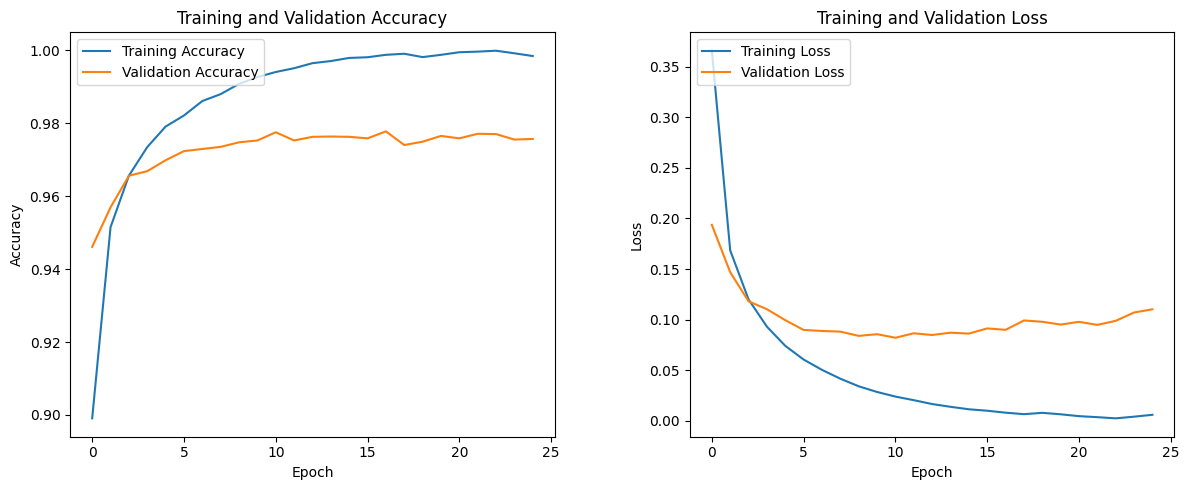

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.1127
Test Loss, Test Accuracy: [0.09558979421854019, 0.9786999821662903]


In [ ]:
#Check second third connected with 1 hidden layer and
last_fully_connected_model = fully_connected_model(1,'relu')
model_structure(last_fully_connected_model)
test_experiment(last_fully_connected_model,x_train,x_test,y_train,y_test,100,25)
evaluate_model_accuracy(last_fully_connected_model, x_test, y_test)

Model: "first_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool1 (MaxPooling2D)              │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2 (MaxPooling2D)              │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flattening (Flatten)                 │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 100)                 │          80,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,214 (391.46 KB)

 Trainable params: 100,214 (391.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 64s 130ms/step - accuracy: 0.8383 - loss: 0.5343 - val_accuracy: 0.9786 - val_loss: 0.0741
Epoch 2/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 62s 129ms/step - accuracy: 0.9808 - loss: 0.0639 - val_accuracy: 0.9824 - val_loss: 0.0587
Epoch 3/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.9860 - loss: 0.0463 - val_accuracy: 0.9852 - val_loss: 0.0483
Epoch 4/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 74s 120ms/step - accuracy: 0.9884 - loss: 0.0367 - val_accuracy: 0.9846 - val_loss: 0.0533
Epoch 5/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 84s 124ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9856 - val_loss: 0.0499
Epoch 6/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 82s 123ms/step - accuracy: 0.9919 - loss: 0.0226 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 7/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 87s 134ms/step - accuracy: 0.9941 - loss: 0.0176 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 8/25
480/480 ━━━━━━━━━━━━━━━━━━━━ 59s 124ms/step - accuracy: 0.9955 - loss: 0

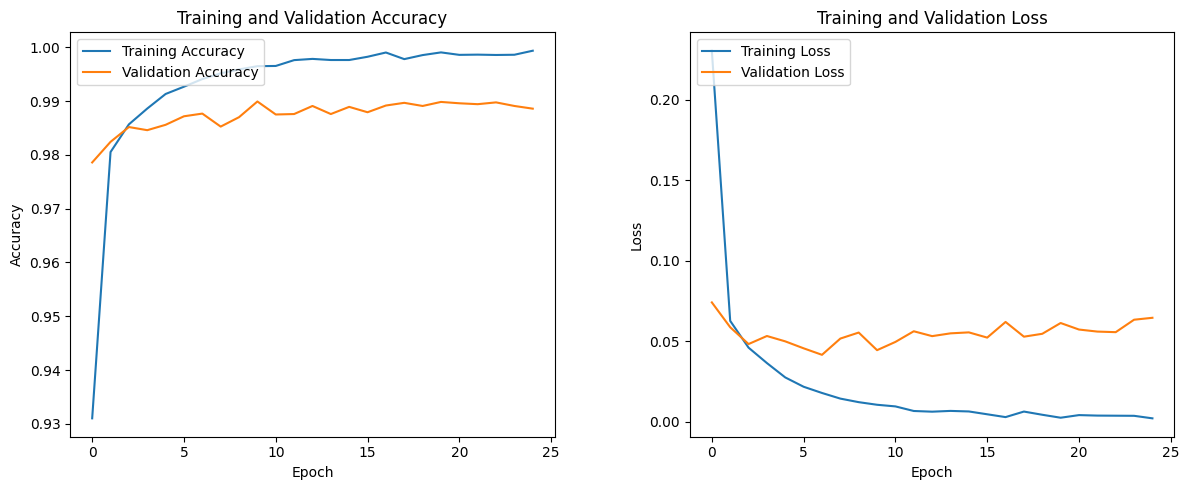

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9879 - loss: 0.0499
Test Loss, Test Accuracy: [0.044053297489881516, 0.9904999732971191]


In [ ]:
#First CNN model with two convolutional layers
first_cnn = make_model('first_cnn', 2,64,32)
model_structure(first_cnn)
test_experiment(first_cnn,x_train,x_test,y_train,y_test,100,25)
evaluate_model_accuracy(first_cnn, x_test, y_test)

**Observations from initial model:** We can see that our init_model is suffering from the problem of overfitting (the training accuracy is steadily increasing but the validation accuracy is not. In fact, the validation accuracy plateaus in the later epochs which suggests overfitting). Also, the accuracy on the test dataset is relatively lower at 98%. We should aim for something closer to 99%.

**Configuration 2**

We modify the init_model with an additional convolutional layer (accompanied by an additional Pooling layer) but with 64 filters and an additional dense layer with 128 neurons before the final softmax layer. These additional layers might help to extract more complex features from the input. In addition, we also decrease the number of epochs from 15 to 10 for now.

In [ ]:
# Build Configuration 2 for cnn
def build_cnn2():
  model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
  ])

  return model_1

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.8574 - loss: 0.5007 - val_accuracy: 0.9770 - val_loss: 0.0825
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9842 - val_loss: 0.0557
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.9885 - loss: 0.0363 - val_accuracy: 0.9866 - val_loss: 0.0463
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.9929 - loss: 0.0236 - val_accuracy: 0.9869 - val_loss: 0.0485
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9876 - val_loss: 0.0503
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9893 - val_loss: 0.0452
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.9968 - loss: 0.0105 - val_accuracy: 0.9882 - val_loss: 0.0449
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9972 - loss: 0.0092 - 

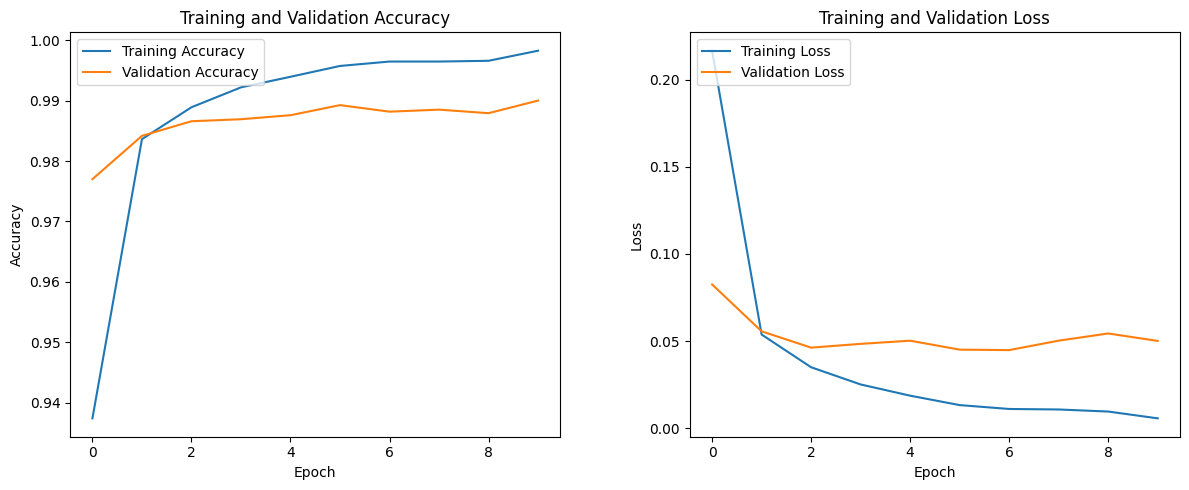

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9860 - loss: 0.0480
Test Loss, Test Accuracy: [0.040096644312143326, 0.989300012588501]


In [ ]:
second_cnn = build_cnn2()

model_structure(second_cnn)
test_experiment(second_cnn,x_train,x_test,y_train,y_test,100,10)
evaluate_model_accuracy(second_cnn, x_test, y_test)

**Observations from second cnn model:**
We can see that our model has improved in terms of accuracy which is over 99% on the test dataset now compared to the init_model. Also, loss seems to have improved compared to our initial fuly connected ANN used.

**Configuration 2**

A second architecture with Dropout layers for dealing with overfitting and increased filter sizes are used.

In [ ]:
# Configuration 2
def build_model_2():
  model_2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
  ])

  return model_2

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 120s 248ms/step - accuracy: 0.8087 - loss: 0.5997 - val_accuracy: 0.9775 - val_loss: 0.0737
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 146s 257ms/step - accuracy: 0.9702 - loss: 0.1042 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 118s 246ms/step - accuracy: 0.9789 - loss: 0.0703 - val_accuracy: 0.9889 - val_loss: 0.0424
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 120s 249ms/step - accuracy: 0.9819 - loss: 0.0603 - val_accuracy: 0.9882 - val_loss: 0.0414
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 142s 250ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9891 - val_loss: 0.0400
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 138s 242ms/step - accuracy: 0.9869 - loss: 0.0412 - val_accuracy: 0.9896 - val_loss: 0.0390
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 145s 248ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0.9901 - val_loss: 0.0406
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 140s 244ms/step - accuracy: 0.9899 -

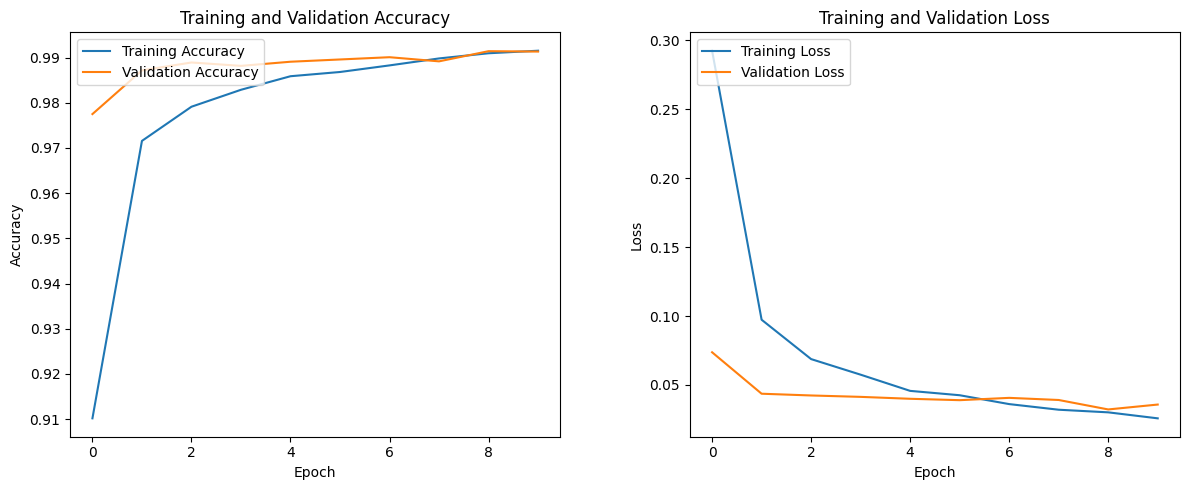

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9908 - loss: 0.0282
Test Loss, Test Accuracy: [0.023295219987630844, 0.9926999807357788]


In [ ]:
third_cnn = build_model_2()

model_structure(third_cnn)
test_experiment(third_cnn,x_train,x_test,y_train,y_test,100,10)
evaluate_model_accuracy(third_cnn, x_test, y_test)

**Observations from Configuration 2 (model_2):** We can see that our model_2 has improved in terms of overfitting while maintaining almost the same accuracy which is over 99%. The problem of overfitting has been removed because of the addition of the dropout layers and therefore the training, validation and test accuracy is almost similar now (99.11%, 99.02% and 99.14% repectively). Now the only thing, I can observe is that we can try to improve the loss.

**Configuration 3**

We can reuse model_2 but change (decrease) the learning rate from the default of 0.001 to 0.0005 and decrease the batch size from 100 to 50 to allow the model more time to learn.

Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 121s 125ms/step - accuracy: 0.7914 - loss: 0.6429 - val_accuracy: 0.9780 - val_loss: 0.0724
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 141s 124ms/step - accuracy: 0.9647 - loss: 0.1188 - val_accuracy: 0.9845 - val_loss: 0.0540
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 140s 123ms/step - accuracy: 0.9757 - loss: 0.0831 - val_accuracy: 0.9875 - val_loss: 0.0456
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 140s 121ms/step - accuracy: 0.9813 - loss: 0.0630 - val_accuracy: 0.9885 - val_loss: 0.0391
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 143s 122ms/step - accuracy: 0.9842 - loss: 0.0530 - val_accuracy: 0.9891 - val_loss: 0.0391
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 144s 124ms/step - accuracy: 0.9868 - loss: 0.0426 - val_accuracy: 0.9895 - val_loss: 0.0355
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 147s 129ms/step - accuracy: 0.9864 - loss: 0.0429 - val_accuracy: 0.9902 - val_loss: 0.0370
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 140s 127ms/step - accuracy: 0.9895 -

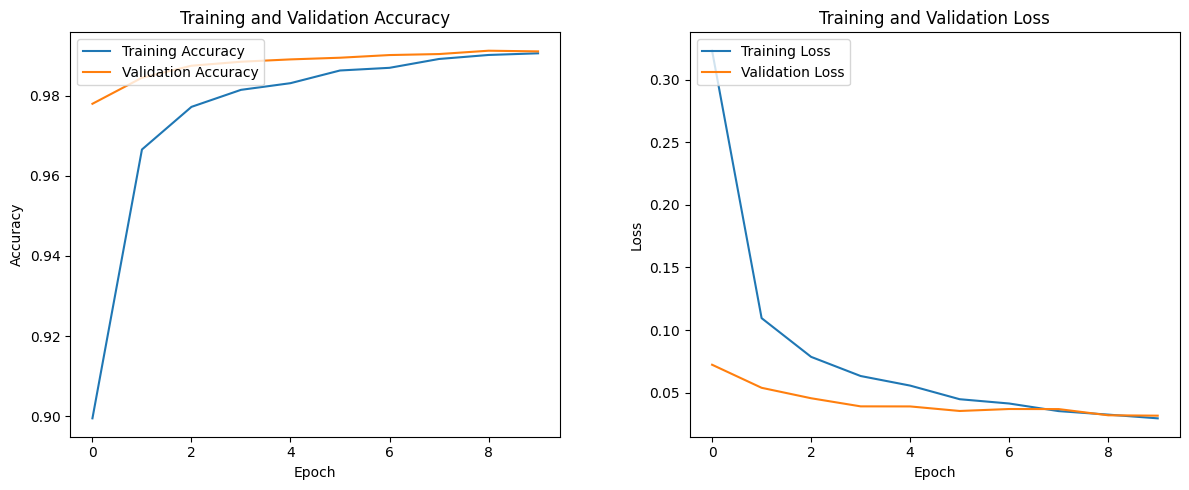

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9874 - loss: 0.0336
Test Loss, Test Accuracy: [0.026199286803603172, 0.9908000230789185]


In [ ]:
# Configuration 3
model_3 = build_model_2()

# Compile
model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

# Train
history = model_3.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=50,
                    validation_split=0.2)

# Plot the training history
plot_training_history(history)

# Evaluate on the MNIST test dataset
evaluate_model_accuracy(model_3, x_test, y_test)

**Observations from Configuration 3 (model_3):** From the above graphs, we can observe that our last configuration is really good at gradually learning and converging. Also, we seem to have improved not only the loss by a little bit but accuracy on the test dataset too (99.28% now). Overall, our model_2 was already performing well and we fine-tuned it even more on model_3.

In [ ]:
# Configuration 2
def build_stride_model():
  model_2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), strides=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
  ])

  return model_2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 117s 241ms/step - accuracy: 0.7953 - loss: 0.6315 - val_accuracy: 0.9780 - val_loss: 0.0748
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 143s 243ms/step - accuracy: 0.9637 - loss: 0.1267 - val_accuracy: 0.9843 - val_loss: 0.0561
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 118s 246ms/step - accuracy: 0.9728 - loss: 0.0925 - val_accuracy: 0.9872 - val_loss: 0.0433
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 138s 238ms/step - accuracy: 0.9791 - loss: 0.0697 - val_accuracy: 0.9868 - val_loss: 0.0431
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 117s 244ms/step - accuracy: 0.9805 - loss: 0.0614 - val_accuracy: 0.9888 - val_loss: 0.0393
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 138s 236ms/step - accuracy: 0.9832 - loss: 0.0544 - val_accuracy: 0.9908 - val_loss: 0.0358
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 145s 242ms/step - accuracy: 0.9862 - loss: 0.0456 - val_accuracy: 0.9915 - val_loss: 0.0349
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 140s 238ms/step - accuracy: 0.9888 -

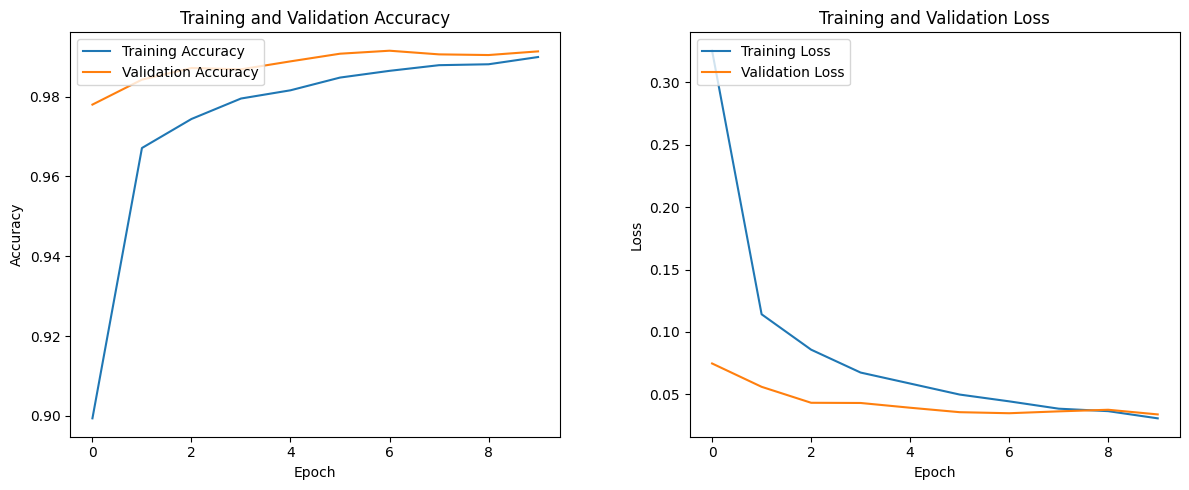

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9911 - loss: 0.0279
Test Loss, Test Accuracy: [0.02292473427951336, 0.993399977684021]


In [ ]:
third_cnn = build_stride_model()

model_structure(third_cnn)
test_experiment(third_cnn,x_train,x_test,y_train,y_test,100,10)
evaluate_model_accuracy(third_cnn, x_test, y_test)